In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("cirrhosis_cleaned.csv")

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.023923
std,1104.672992,3815.845055,4.407506,191.077413,0.424972,73.697982,1848.437803,48.965657,53.479887,97.020057,1.019547,0.875678
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,273.000000,3.242500,51.250000,1016.250000,91.000000,95.000000,190.000000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,369.510563,3.530000,97.648387,1717.000000,122.556346,124.702128,253.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,369.510563,3.770000,100.750000,1982.655769,135.750000,127.750000,315.500000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [6]:
#Categorizing numerical and categorical feautures
num_features=df.select_dtypes(exclude='object').columns
cat_features=df.select_dtypes(include='object').columns

HEATMAP

<Axes: title={'center': 'Heatmap of the Features'}>

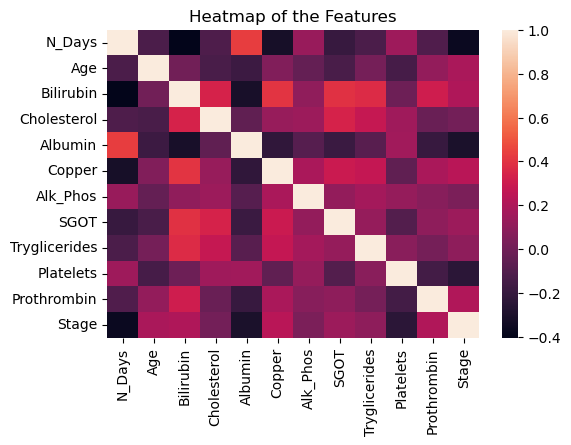

In [7]:
plt.figure(figsize=(6,4))
plt.title('Heatmap of the Features')
cor_mat=df[num_features].corr()
sns.heatmap(cor_mat)

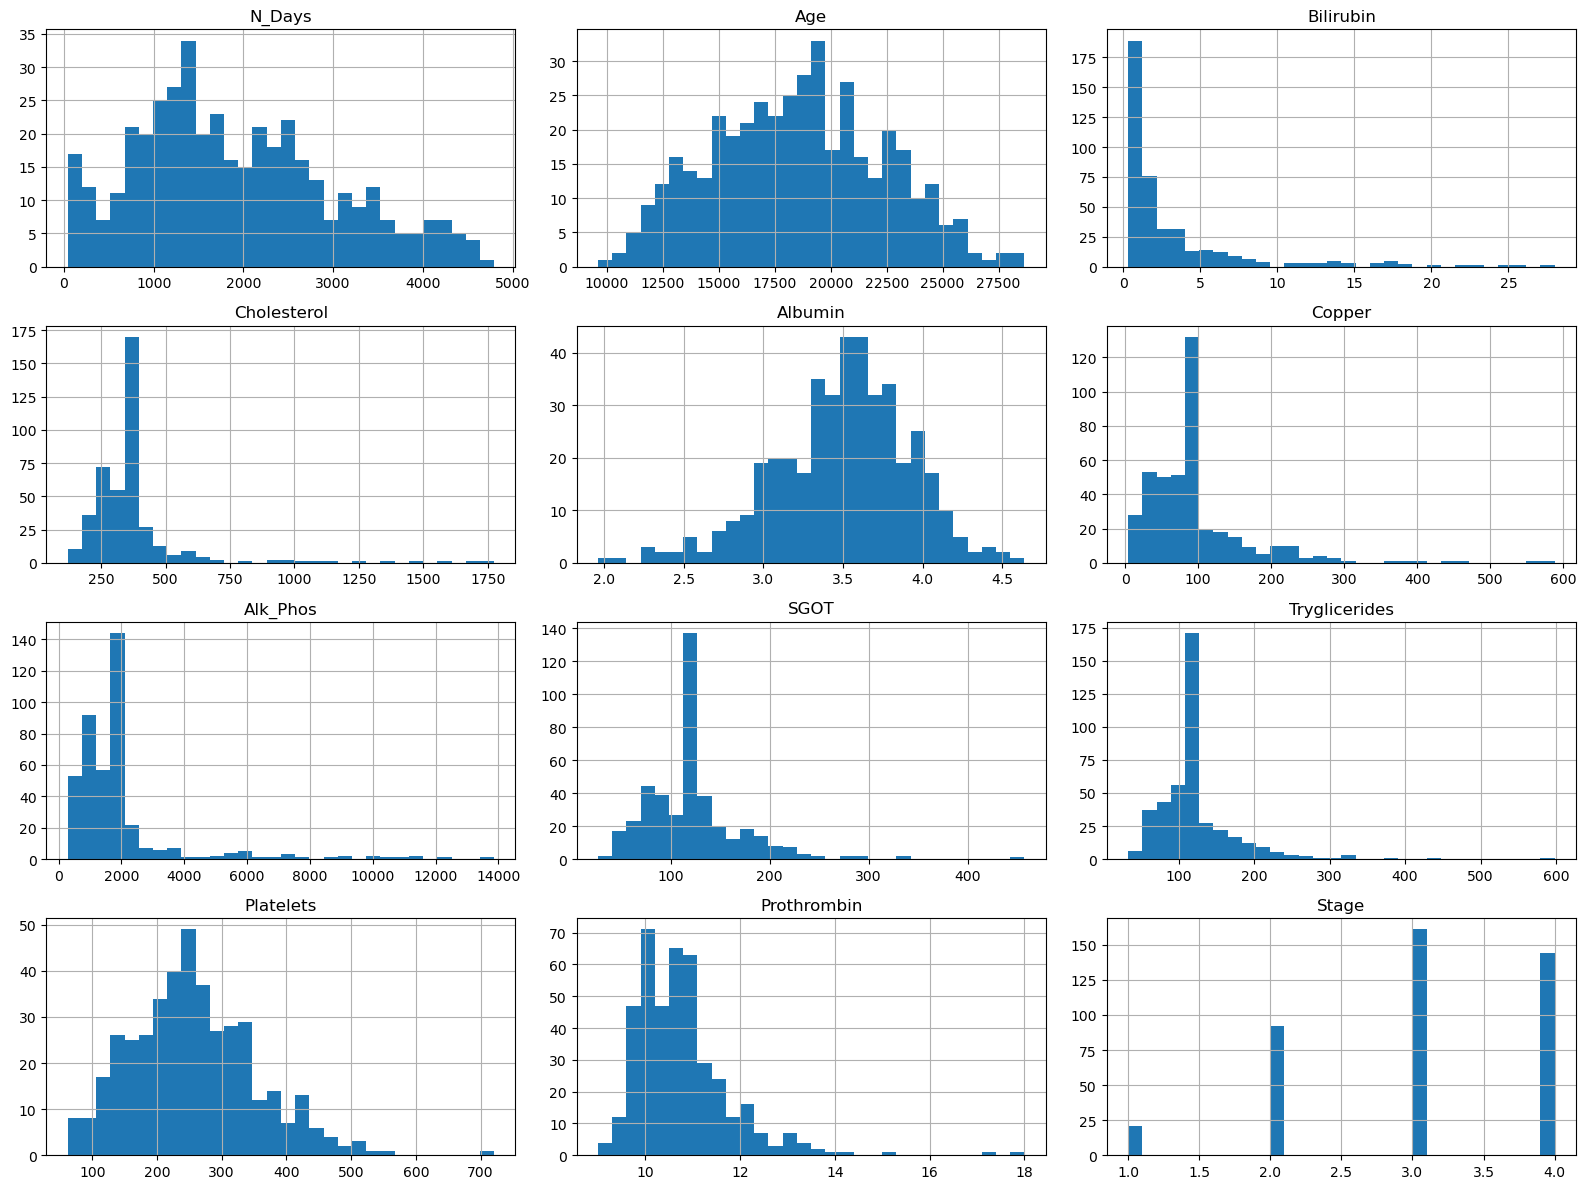

In [10]:
#Histogram
df[num_features].hist(figsize=(16,12),bins=30)
plt.tight_layout()
plt.show()

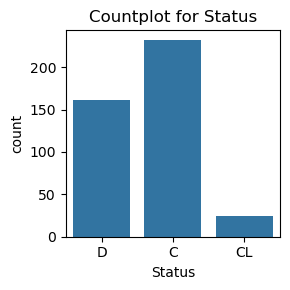

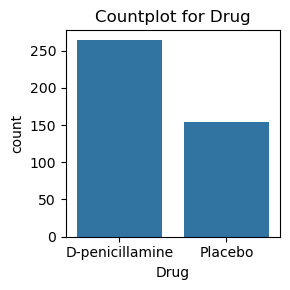

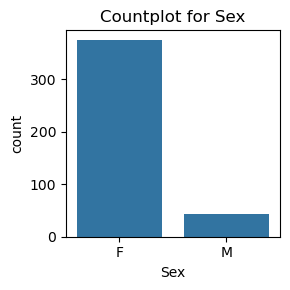

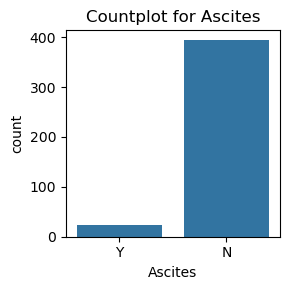

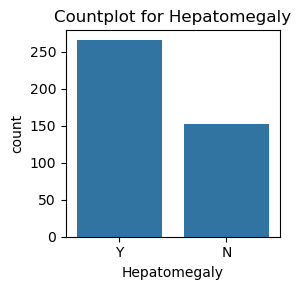

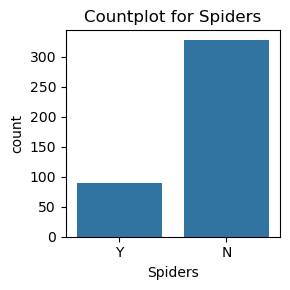

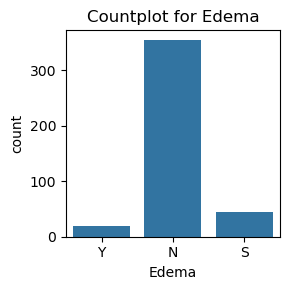

In [11]:
for col in cat_features:
    plt.figure(figsize=(3,3))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot for {col}")
    plt.tight_layout()
    plt.show()

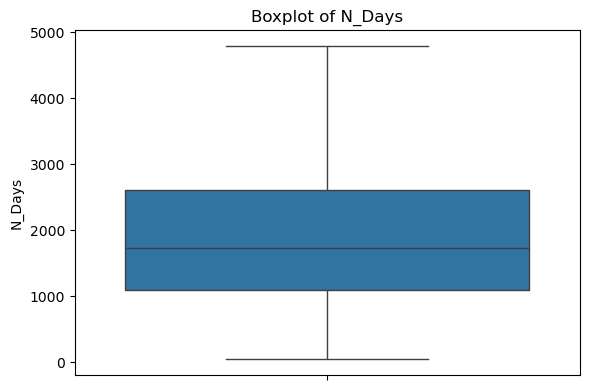

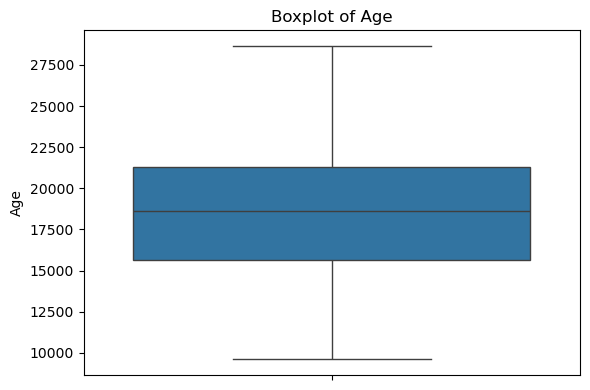

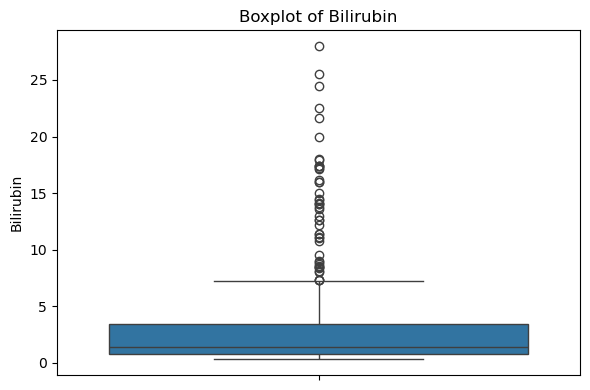

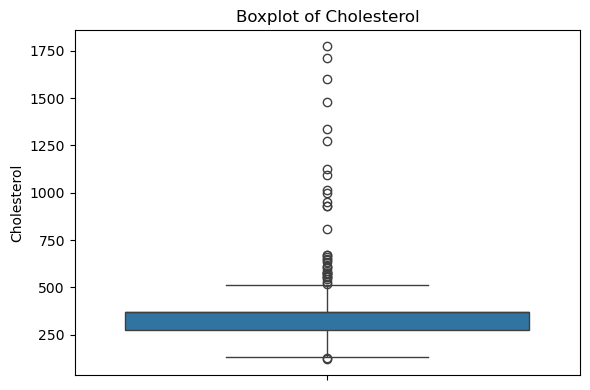

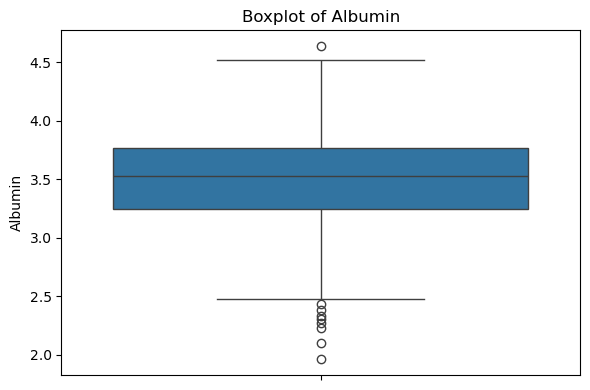

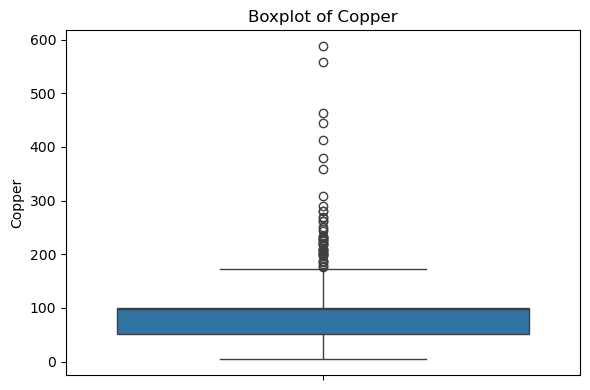

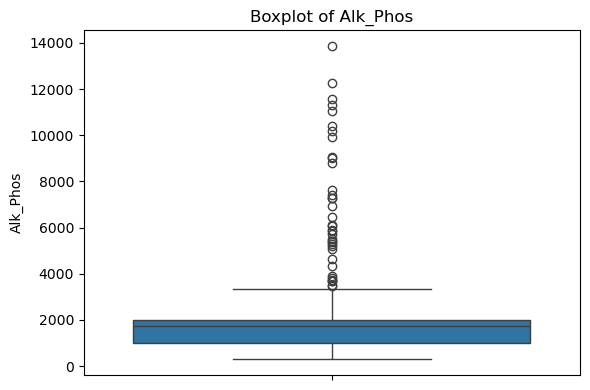

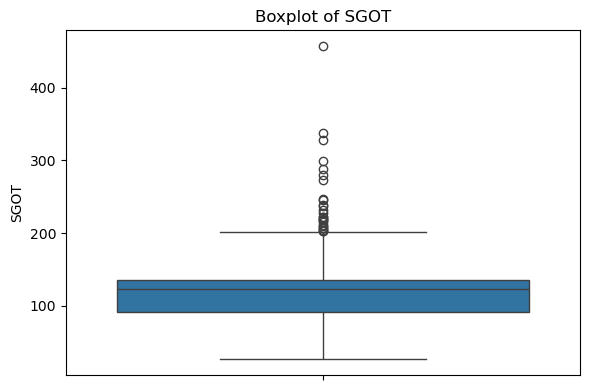

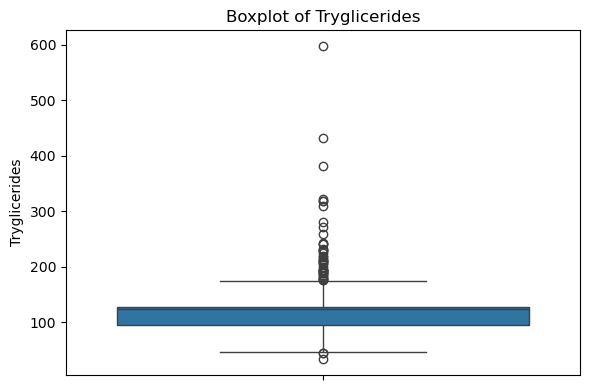

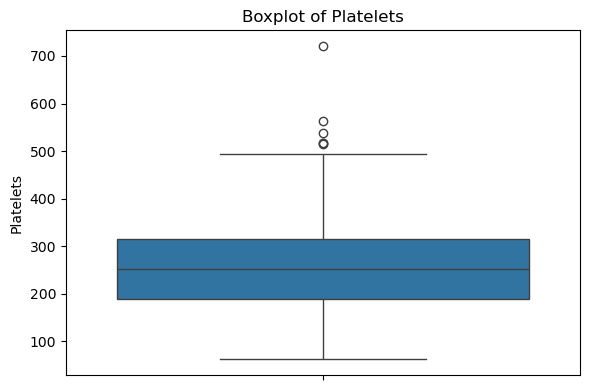

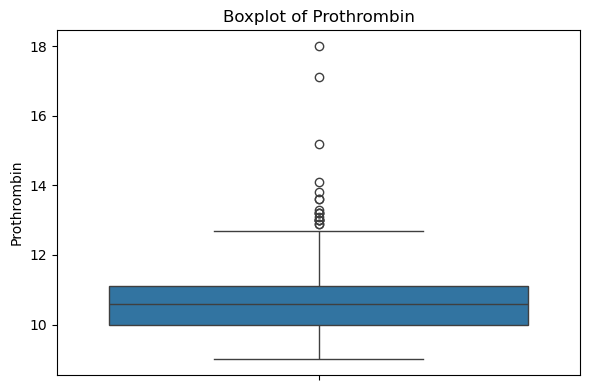

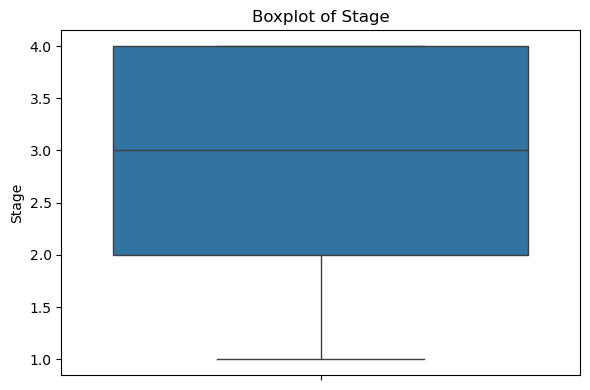

In [12]:
for col in num_features:
     plt.figure(figsize=(6,4))
     sns.boxplot(data=df,y=col)
     plt.title(f"Boxplot of {col}")
     plt.tight_layout()
     plt.show()

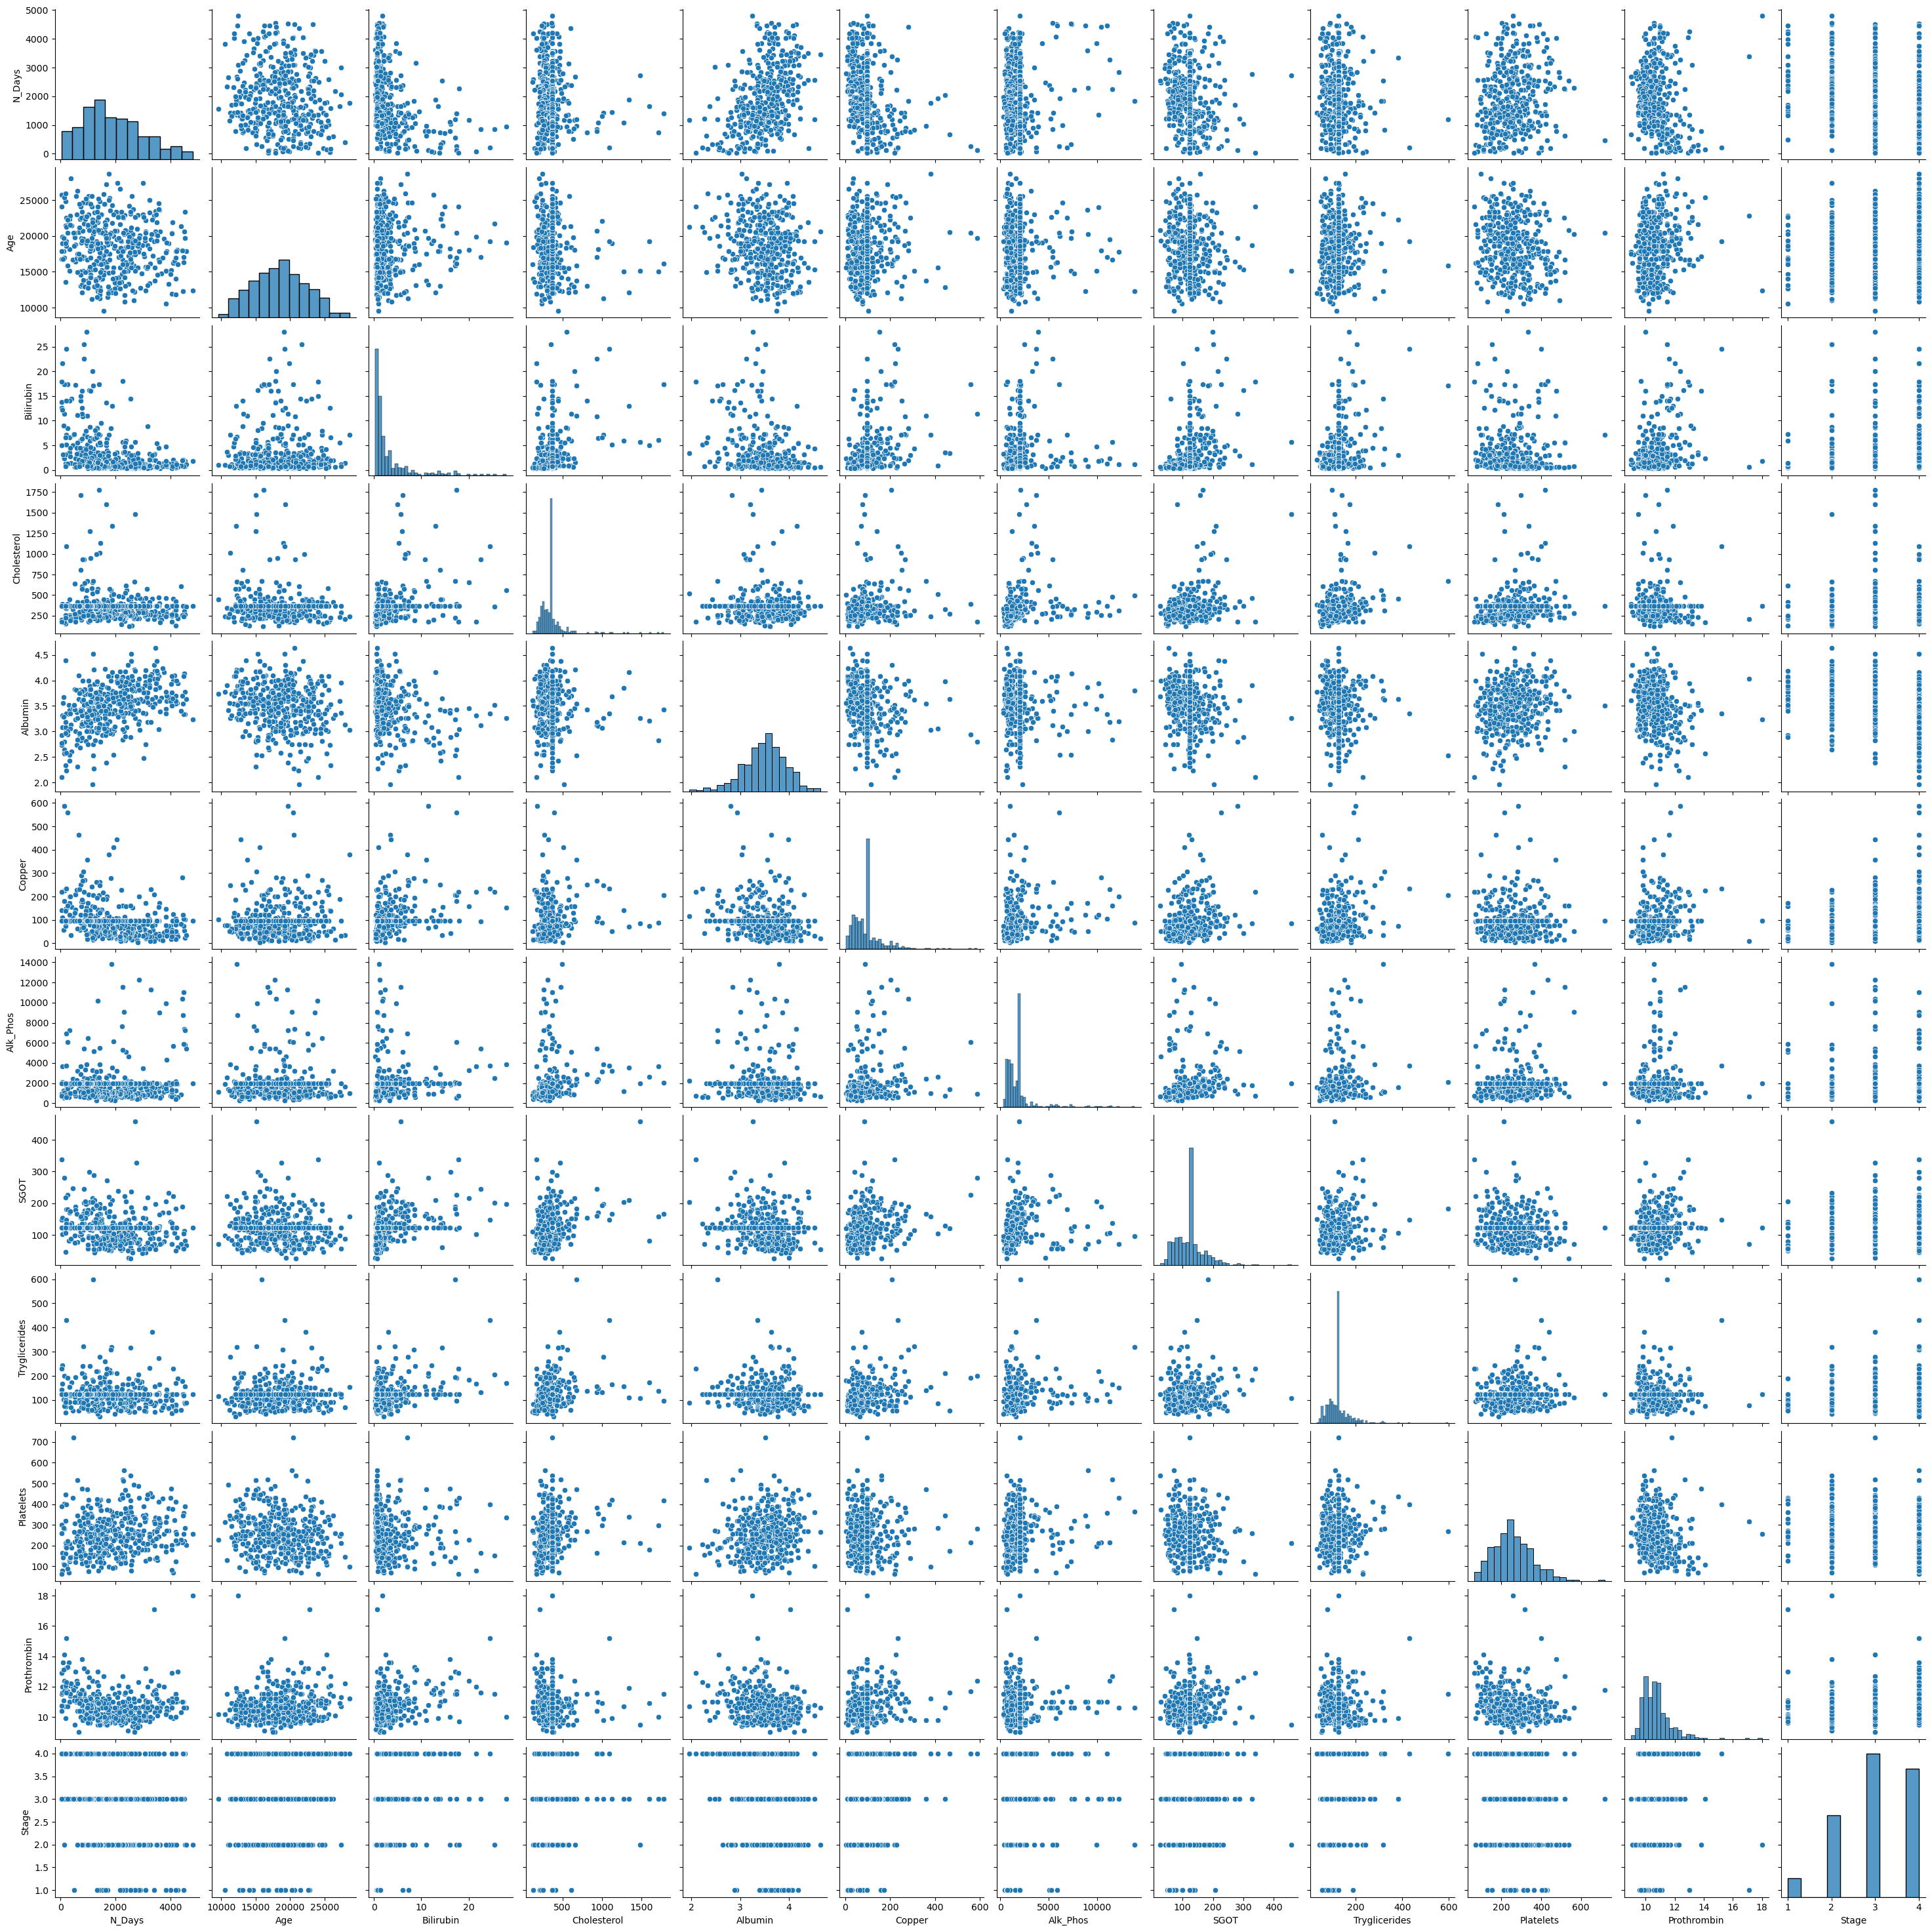

In [34]:
sns.pairplot(df[num_features])

([<matplotlib.patches.Wedge at 0x26eb3c5dd30>,
 [Text(1.1600309617796833, 0.5867948259080876, ''),
  Text(-0.9815646134799847, -0.4965187907460185, '')],
 [Text(0.7138652072490359, 0.36110450825113083, ' 14.9%'),
  Text(-0.5353988800799916, -0.2708284313160101, ' 85.1%')])

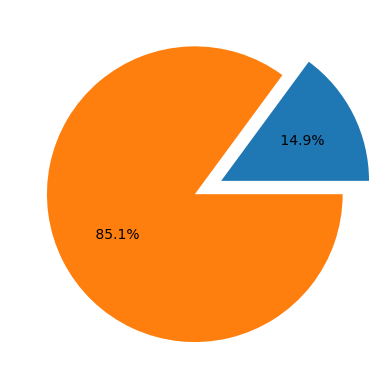

In [ ]:
#Pie Chart
num_males = df[(df['Sex'] == 'M') & (df['Status'] == 'D')].shape[0]
num_females = df[(df['Sex'] == 'F') & (df['Status'] == 'D')].shape[0]
p1=num_males/(num_males+num_females)
p2=num_females/(num_males+num_females)
plt.pie(np.array([p1,p2]),autopct="% 1.1f%%",explode=(0.2,0))

In [42]:
df.Drug.value_counts()

Drug
D-penicillamine    264
Placebo            154
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x26eb3cfa7b0>,
 [Text(-0.5062634667122398, 1.1973709960878898, 'D-penicillamine'),
  Text(0.4283766846668475, -1.0131601137203539, 'Placebo')],
 [Text(-0.31154674874599364, 0.7368436899002399, ' 62.7%'),
  Text(0.23366000981828042, -0.5526327893020112, ' 37.3%')])

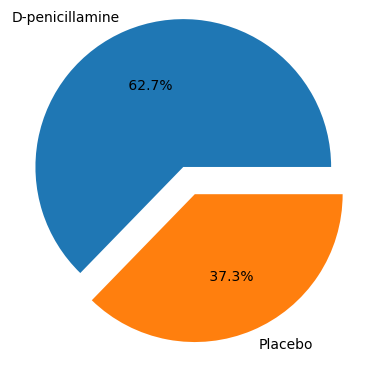

In [44]:
#Pie Chart
num_d = df[(df['Drug'] =='D-penicillamine') & (df['Status'] == 'D')].shape[0]
num_placebo = df[(df['Drug'] == 'Placebo') & (df['Status'] == 'D')].shape[0]
p1=num_d/(num_d+num_placebo)
p2=num_placebo/(num_d+num_placebo)
plt.pie(np.array([p1,p2]),autopct="% 1.1f%%",explode=(0.2,0),labels=['D-penicillamine','Placebo'])